In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
import random
import matplotlib.pyplot as plt
from tkinter import *


def onshore():
    global fundsname1,df1
    number = int(ee1.get())
    options = webdriver.ChromeOptions()

    browser = webdriver.Chrome(options=options)


    url = 'https://announce.fundclear.com.tw/MOPSonshoreFundWeb/INQ713.jsp?commit=1&fundClassType=2&statType=1&fundAsset=all&fundInv=all&fundCurr=all&fromTo=1&dataRange=1'

    browser.get(url)
    fundsname1 = [] #此空串列用來儲存目標串列
    money1 = [] #申購金額
    money2 = [] #買回金額
    money3 = [] #淨申贖金額
    money4 = [] #國人持有金額
    money5 = [] #
    money6 = []
    check_box_keys = ['第11~20','第21~30','第31~40','第41~50','第51~60','第61~70','第71~80','第81~90','第91~100','第1~10']
    n = 0 #下拉選單的索引

    while n < (number/10):
        soup = BeautifulSoup(browser.page_source, 'html.parser')
        content = soup.select("td a") #網頁td標籤下a標籤的內容串列
        information = [] #此空串列用來儲存content的text
        targetstr = [] #此空串列用來儲存含有基金的目標字串
        targetstr2 = [] #此空串列用來儲存含基金的申購金額
        t = 0
        for i in content: #將content的text存進information串列
            information.append(i.text)
        x = 0 #索引0
        
        for i in information: #求出要忽略的最後一筆資料的索引值x
            if i == "下載專區\n\t\t      ":
                t = x
            x += 1
        information2 = information[(t+2):]
        nn = 1 #申購金額的索引
        nn2 = 2 #買回金額
        nn3 = 3 #淨申贖金額
        nn4 = 4 #基金規模
        nn5 = 5 #基金淨值
        for i in information2: #將索引39之後含反斜線r的資料加入targetstr串列
            if "基金" in i:
                targetstr.append(i)
            if nn < len(information2): #將申購金額加入money1串列
                money1.append(float(information2[nn].replace(',','')))
                nn += 8
            if nn2 < len(information2): #將買回金額加入money1串列
                money2.append(float(information2[nn2].replace(',','')))
                nn2 += 8
            if nn3 < len(information2): #將淨申贖金額加入money1串列
                money3.append(float(information2[nn3].replace(',','')))
                nn3 += 8
            if nn4 < len(information2): #將國人持有金額加入money1串列
                money4.append(float(information2[nn4].replace(',','')))
                nn4 += 8
            if nn5 < len(information2): #將基金規模加入money1串列
                money5.append(float(information2[nn5].replace(',','')))
                nn5 += 8
        for i in targetstr: #將不需要的字元\r、\n、\t替換成空字串然後加入funds串列
            b = i.replace("\r","") #空字串取代字元\r
            c = b.replace("\n","") #空字串取代字元\n
            d = c.replace("\t","") #空字串取代字元\t
            fundsname1.append(d) #清理好的字串放入funds串列
        time.sleep(random.randint(4,8))
        check_box = browser.find_element("name", "fromTo")
        check_box.send_keys(check_box_keys[n])
        n += 1
        browser.find_element(By.NAME,"btnQuery").click()
        time.sleep(random.randint(4,8))
    all_data = list(zip(fundsname1,money1,money2,money3,money4,money5))
    df1 = pd.DataFrame(all_data, columns = ['基金名稱' , '申購金額', '買回金額','淨申贖金額','基金規模','淨值'])
    browser.quit()

def offshore():
    global fundsname2,df2 
    number = int(ee1.get())
    options = webdriver.ChromeOptions()
    browser = webdriver.Chrome(options=options)
    url = 'https://announce.fundclear.com.tw/MOPSFundWeb/INQ712.jsp?commit=1&fundClassType=1&statType=1&fundAsset=all&fundInv=all&fundCurr=all&fromTo=1&dataRange=1'
    browser.get(url)
    fundsname2 = [] #此空串列用來儲存目標串列
    money1 = [] #申購金額
    money2 = [] #買回金額
    money3 = [] #淨申贖金額
    money4 = [] #國人持有金額
    money5 = [] #基金規模
    money6 = [] #國人持有規模占基金規模比重
    check_box_keys = ['第11~20','第21~30','第31~40','第41~50','第51~60','第61~70','第71~80','第81~90','第91~100','第1~10']
    n = 0 #下拉選單的索引

    while n < (number/10):
        soup = BeautifulSoup(browser.page_source, 'html.parser')
        content = soup.select("td a") #網頁td標籤下a標籤的內容串列
        information = [] #此空串列用來儲存content的text
        targetstr = [] #此空串列用來儲存含有基金的目標字串
        targetstr2 = [] #此空串列用來儲存含基金的申購金額
        t = 0
        information = [i.text for i in content] #將content的text存進information串列
        x = 0 #索引0
        for i in information: #求出要忽略的最後一筆資料的索引值x
            if i == "下載專區\n\t\t      ":
                t = x
            x += 1
        information2 = information[(t+2):]
        nn = 1 #申購金額
        nn2 = 2 #買回金額
        nn3 = 3 #淨申贖金額
        nn4 = 4 #國人持有金額
        nn5 = 5 #基金規模
        nn6 = 6 #國人持有金額占基金規模比重
        targetstr = [i for i in information2 if "基金" in i] #將基金名稱的資料(未清整)加入targetstr
        for i in information2: #將要的金額資料加入list
            if nn < len(information2): #將申購金額加入money1串列
                money1.append(float(information2[nn].replace(',','')))
                nn += 9
            if nn2 < len(information2): #將買回金額加入money1串列
                money2.append(float(information2[nn2].replace(',','')))
                nn2 += 9
            if nn3 < len(information2): #將淨申贖金額加入money1串列
                money3.append(float(information2[nn3].replace(',','')))
                nn3 += 9
            if nn4 < len(information2): #將國人持有金額加入money1串列
                money4.append(float(information2[nn4].replace(',','')))
                nn4 += 9
            if nn5 < len(information2): #將基金規模加入money1串列
                money5.append(float(information2[nn5].replace(',','')))
                nn5 += 9
            if nn6 < len(information2): #將國人持有規模比重加入money1串列
                money6.append(float(information2[nn6].replace(',','')))
                nn6 += 9
        for i in targetstr: #將不需要的字元\r、\n、\t替換成空字串然後加入funds串列
            b = i.replace("\r","") #空字串取代字元\r
            c = b.replace("\n","") #空字串取代字元\n
            d = c.replace("\t","") #空字串取代字元\t
            fundsname2.append(d) #清理好的字串放入funds串列
            
        time.sleep(random.randint(2,5))
        check_box = browser.find_element("name", "fromTo")
        check_box.send_keys(check_box_keys[n])
        n += 1
        browser.find_element(By.NAME,"btnQuery").click()
        time.sleep(random.randint(2,5))
    
    all_data = list(zip(fundsname2,money1,money2,money3,money4,money5,money6))
    df2 = pd.DataFrame(all_data, columns = ['基金名稱' , '申購金額', '買回金額','淨申贖金額','國人持有金額','基金規模','國人持有規模比重'])
    browser.quit()
    
    
def graph():    
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #提供字型避免圖軸標題中文產生亂碼 (matplotlib不支援中文)
    colrogroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
    company = ['元大','台新','中國信託','兆豐','日盛','國泰','群益','富邦','華南']

    company_count = []
    for name in company:
        count = 0
        for mentioned in fundsname1:
            if name in mentioned:
                count = count + 1
        company_count.append(count)

    plt.bar(company, company_count, color=colrogroup1) 
    plt.xticks(fontsize=15,rotation=90)

    for index, data in enumerate(company_count):
        plt.text(x=index, y =data, s=data, verticalalignment="top", horizontalalignment="center")

    plt.xlabel('基金公司', fontsize=15)
    plt.ylabel(f'申購金額排名前{ee1.get()}的數量', fontsize=15)
    plt.title(f'主要境內基金公司申購金額占前{ee1.get()}名的基金長條圖', fontsize=20)
    plt.show()

def graph2():
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #提供字型避免圖軸標題中文產生亂碼 (matplotlib不支援中文)
    colrogroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
    company = ['富蘭克林','聯博','摩根','富達','野村','貝萊德','安聯','施羅德','PIMCO']

    company_count = []
    for name in company:
        count = 0
        for mentioned in fundsname2:
            if name in mentioned:
                count = count + 1
        company_count.append(count)

    plt.bar(company, company_count, color=colrogroup1) 
    plt.xticks(fontsize=15,rotation=90)

    for index, data in enumerate(company_count):
        plt.text(x=index, y =data, s=data, verticalalignment="top", horizontalalignment="center")

    plt.xlabel('基金公司', fontsize=15)
    plt.ylabel(f'申購金額排名前{ee1.get()}的數量', fontsize=15)
    plt.title(f'主要境外基金公司申購金額占前{ee1.get()}名的基金長條圖', fontsize=20)
    plt.show()
    #print(type(plt))


def statistics1():
    mean1 = df1['申購金額'].mean(axis=None)
    std1 = df1['申購金額'].std(axis=None)
    df1["result"] = df1['申購金額'] + df1['買回金額']
    sum1 = df1["result"].sum(axis = None)
    text.insert(END,f'前{ee1.get()}名申購金額平均值(新台幣百萬元):',mean1,'申購金額標準差(新台幣百萬元):',std1,'交易額(申購+買回):',sum1)
    
def statistics2():
    mean1 = df2['申購金額'].mean(axis=None)
    std1 = df2['申購金額'].std(axis=None)
    df2["result"] = df2['申購金額'] + df2['買回金額']
    sum2 = df2["result"].sum(axis = None)
    text.insert(END,f'前{ee1.get()}名申購金額平均值(新台幣百萬元):',mean1,'申購金額標準差(新台幣百萬元):',std1,'交易額(申購+買回):',sum2)

def top5_1():
    text.insert(END,fundsname1[0],fundsname1[1],fundsname1[2],fundsname1[3],fundsname1[4])
    

def top5_2():
    text.insert(END,fundsname2[0],fundsname2[1],fundsname2[2],fundsname2[3],fundsname2[4])


def main():
    global ee1,text
    background = Tk() #啟動Tkinter，即設置一個空白畫布。
    
    background.title('境內外基金申購金額統計') #設置視窗標題名稱
    
    background.geometry('600x600') #調整視窗大小
    
    Label(background,text='請選擇欲爬取範圍(1~100名,限制10的倍數):',font=("微軟雅黑",15),fg='Black').pack(fill=BOTH,expand = True) #不能同時用pack和grid
    #Label()文字型態標籤，第一個參數為畫布、第二個參數為所欲顯示字樣、第三個參數是字體與大小、第四個為顏色。
    #grid()指該原件擺放位置，類似坐標概念，預設為0,0。
    ee1 = Entry(background)
    ee1.pack()
    btn1 = Button(background,text='爬取境內資料',fg='Blue',command=onshore).pack(expand = True)
    
    number=Entry(background,font=("微軟雅黑",15))  
    #Entry()是可輸入型態的文字框，第一個參數為畫布、第二個參數是字體與大小。
    
    
    btn4 = Button(background,text='顯示圖表(境內)',fg='Blue',relief = GROOVE,command=graph)
    btn4.pack(side = TOP,expand = True)
    btn6 = Button(background,text = "列印統計值(境內)",fg='Blue',relief = GROOVE,command = statistics1)
    btn6.pack(side = TOP,expand = True)
    btn8 = Button(background,text = '顯示前五名基金(境內):',fg='Blue',relief = GROOVE,command = top5_1)
    btn8.pack(side = TOP,expand = True)
    
    btn2 = Button(background,text='爬取境外資料',fg='Red',command=offshore).pack(expand = True)
    btn5 = Button(background,text='顯示圖表(境外)',fg='Red',relief = GROOVE,command=graph2)
    btn5.pack(side = TOP,expand = True)
    btn7 = Button(background,text = "列印統計值(境外)",fg='Red',relief = GROOVE,command = statistics2)
    btn7.pack(side = TOP,expand = True)
    btn8 = Button(background,text = '顯示前五名基金(境外):',fg='Red',relief = GROOVE,command = top5_2)
    btn8.pack(side = TOP,expand = True)
    
    text=Listbox(background,font=('微軟雅黑',15),width = 50)
    text.pack(side = TOP,expand = True)
    
    
    
    mainloop() #讓畫布always處於顯示的狀態

7

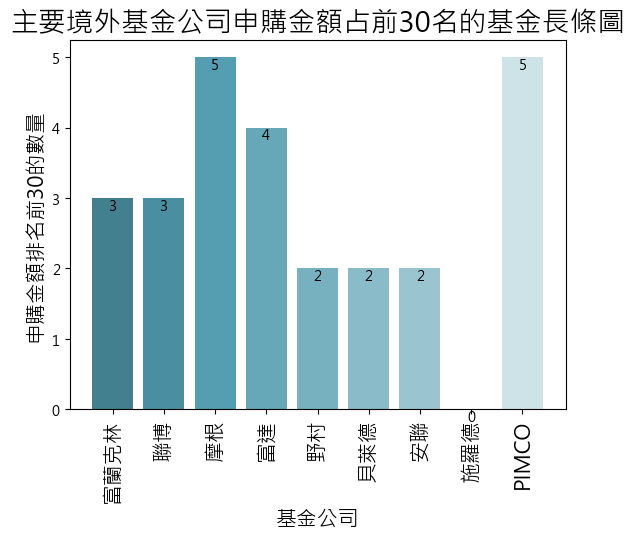

In [2]:
main()